In [20]:
!pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 640.0 kB/s eta 0:02:36
   ---------------------------------------- 0.0/99.8 MB 640.0 kB/s eta 0:02:36
   ---------------------------------------- 0.1/99.8 MB 372.4 kB/s eta 0:04:28
   ---------------------------------------- 0.1/99.8 MB 581.0 kB/s eta 0:02:52
   ---------------------------------------- 0.1/99.8 MB 599.1 kB/s eta 0:02:47
   ---------------------------------------- 0.2/99.8 MB 697.2 kB/s eta 0:02:23
   ---------------------------------------- 0.2/99.8 MB 860.2 kB/s eta 0:01:56
   ---------------------------------------- 0.3/99.8 MB 817.9 kB/s eta 0:02:02
   ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:31
   ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.4/99.8 MB 1.0 MB/s eta 0:01:


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ----------- ---------------------------- 29.7/99.8 MB 1.0 MB/s eta 0:01:08
   ----------- ---------------------------- 29.7/99.8 MB 1.0 MB/s eta 0:01:08
   ----------- ---------------------------- 29.7/99.8 MB 1.0 MB/s eta 0:01:08
   ----------- ---------------------------- 29.7/99.8 MB 1.0 MB/s eta 0:01:08
   ----------- ---------------------------- 29.9/99.8 MB 1.0 MB/s eta 0:01:08
   ----------- ---------------------------- 29.9/99.8 MB 1.0 MB/s eta 0:01:08
   ------------ --------------------------- 30.0/99.8 MB 1.0 MB/s eta 0:01:08
   ------------ --------------------------- 30.0/99.8 MB 1.0 MB/s eta 0:01:08
   ------------ --------------------------- 30.0/99.8 MB 1.0 MB/s eta 0:01:08
   ------------ --------------------------- 30.1/99.8 MB 1.0 MB/s eta 0:01:08
   ------------ --------------------------- 30.1/99.8 MB 1.0 MB/s eta 0:01:08
   ------------ --------------------------- 30.2/99.8 MB 1.0 MB/s eta 0:01:07
   ------------ --------------------------- 30.2/99.8 MB 1.0 MB

In [2]:
data = pd.read_csv("concrete_data.csv")
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
X = data.iloc[:, :8].values
Y = data.iloc[:, 8].values.reshape(-1,1)

In [4]:
print(np.shape(X))
print(np.shape(Y))

(1030, 8)
(1030, 1)


In [7]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

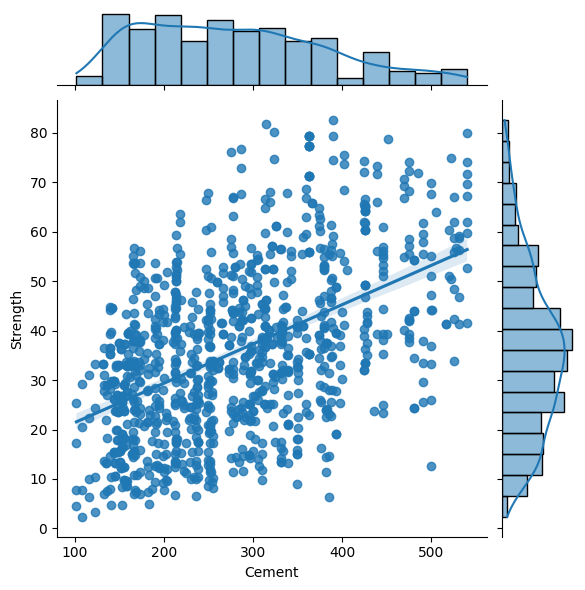

In [12]:
sns.jointplot(x='Cement',y='Strength',data=data,kind='reg')

<Axes: >

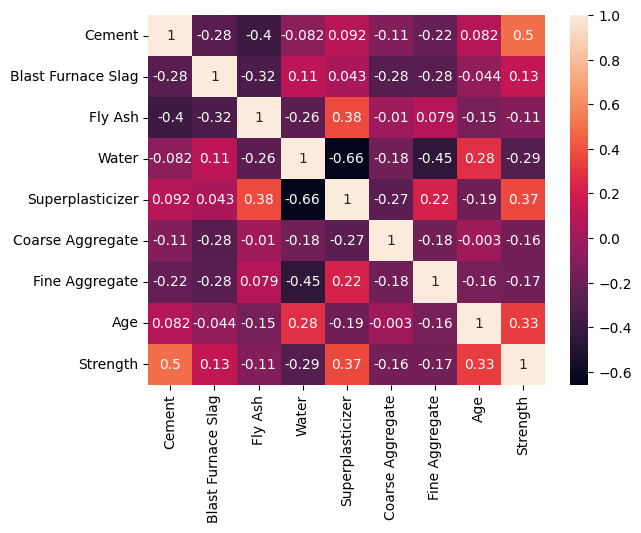

In [14]:
sns.heatmap(data.corr(), annot=True ,cmap="rocket")

<Axes: >

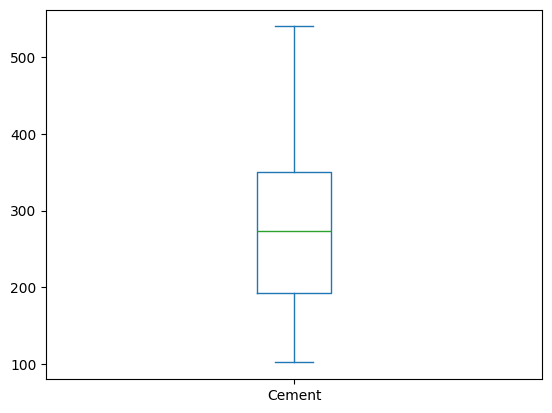

In [15]:
data.Cement.plot.box()

<Axes: >

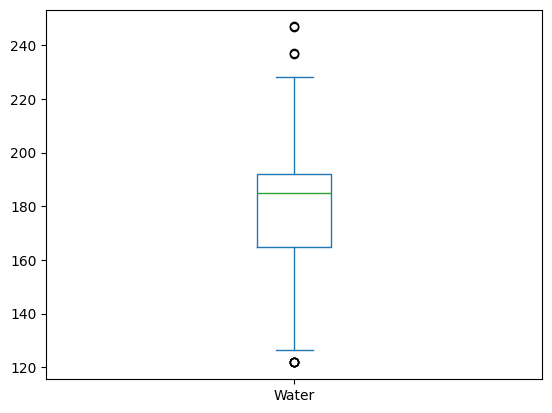

In [16]:
data['Water'].plot.box()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=2021)

In [23]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2021)

In [24]:
# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

In [25]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [26]:
GS.fit(X_train, Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-15.323) r2: (test=0.112) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-15.412) r2: (test=0.103) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-16.069) r2: (test=0.119) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-15.383) r2: (test=0.106) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-16.454) r2: (test=0.108) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-14.442) r2: (test=0.211) total time=   0

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=2021, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-35.434) r2: (test=-3.741) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-37.039) r2: (test=-3.522) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-31.977) r2: (test=-2.868) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-33.296) r2: (test=-3.187) total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-32.656) r2: (test=-2.640) total time=   0.2s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-32.297) r2: (test=-2.939) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=9, 

[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-4.770) r2: (test=0.914) total time=   1.1s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-4.734) r2: (test=0.923) total time=   1.0s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-4.697) r2: (test=0.917) total time=   1.2s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-5.774) r2: (test=0.890) total time=   1.2s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4.425) r2: (test=0.926) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-5.440) r2: (test=0.888) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; neg_

[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-5.292) r2: (test=0.894) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-5.164) r2: (test=0.909) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-4.721) r2: (test=0.916) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-6.131) r2: (test=0.876) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-4.707) r2: (test=0.916) total time=   0.2s
[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-5.239) r2: (test=0.896) total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=3, n_estimators=500; neg_root_mean_squared_

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...,
                                    num_parallel_tree=None, random_state=2021,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_param

In [28]:
print(GS.best_estimator_) # to get the complete details of the best model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=2021, ...)


In [29]:
print(GS.best_params_) # to get only the best hyperparameter values that we searched for

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [30]:
print(GS.best_score_) # score according to the metric we passed in refit

0.921563136246513


In [31]:
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv", index = False)